In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')
from sklearn.datasets import fetch_olivetti_faces
import time
import timeit
%matplotlib inline

C:\Users\Anurag Rana\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
## PLEASE DO NOT EDIT THIS CELL
import sys
image_shape = (64, 64)
# Load faces data
dataset = fetch_olivetti_faces(data_home='./')
faces = dataset.data

print('Shape of the faces dataset: {}'.format(faces.shape))
print('{} data points'.format(faces.shape[0]))
size = sys.getsizeof(faces)
print("Size of my_list:", size, "bytes")
rows = len(faces)  # Number of rows
cols = len(faces[0])  # Number of columns
print("Dimensions of my_list:", rows, "rows and", cols, "columns")

Shape of the faces dataset: (400, 4096)
400 data points
Size of my_list: 128 bytes
Dimensions of my_list: 400 rows and 4096 columns


In [6]:
## PLEASE DO NOT EDIT THIS CELL

from ipywidgets import interact

In [7]:
## PLEASE DO NOT EDIT THIS CELL

def show_face(face):
    plt.figure()
    plt.imshow(face.reshape((64, 64)), cmap='gray')
    plt.show()

In [8]:
## PLEASE DO NOT EDIT THIS CELL

@interact(n=(0, len(faces)-1))
def display_faces(n=0):
    plt.figure()
    plt.imshow(faces[n].reshape((64, 64)), cmap='gray')
    plt.show()

interactive(children=(IntSlider(value=0, description='n', max=399), Output()), _dom_classes=('widget-interact'…

In [9]:
# ===YOU SHOULD EDIT THIS FUNCTION===
def mean_naive(X):
    """Compute the mean for a dataset by iterating over the dataset
    
    Arguments
    ---------
    X: (N, D) ndarray representing the dataset.
        N is the number of samples in the dataset 
        and D is the feature dimension of the dataset
    
    Returns
    -------
    mean: (D, ) ndarray which is the mean of the dataset.
    """
    N, D = X.shape
    mean = np.zeros(D)
    # The naive approach requires us to iterate over the whole dataset with a for loop.
    for n in range(N):
        mean = mean + X[n]/N
    return mean

# ===YOU SHOULD EDIT THIS FUNCTION===
def cov_naive(X):
    """Compute the covariance for a dataset
    Arguments
    ---------
    X: (N, D) ndarray representing the dataset. 
        N is the number of samples in the dataset 
        and D is the feature dimension of the dataset
    
    Returns
    -------
    covariance: (D, D) ndarray which is the covariance matrix of the dataset.
    
    """
    N, D = X.shape
    covariance = np.zeros((D, D))
    for n in range(N):
        covariance = covariance + np.dot((X[n]-mean_naive(X)).T, (X[n]-mean_naive(X)))/N
    return covariance

In [11]:
## PLEASE DO NOT EDIT THIS CELL

## PLEASE DO NOT EDIT THIS CELL

from numpy.testing import assert_allclose

# Test case 1
X = np.array([[0., 1., 1.], 
              [1., 2., 1.]])
expected_mean = np.array([0.5, 1.5, 1.])
assert_allclose(mean_naive(X), expected_mean, rtol=1e-5)

# Test case 2
X = np.array([[0., 1., 0.], 
              [2., 3., 1.]])
expected_mean = np.array([1., 2., 0.5])  # Corrected
assert_allclose(mean_naive(X), expected_mean, rtol=1e-5)

# Test covariance is zero
X = np.array([[0., 1.], 
              [0., 1.]])
expected_mean = np.array([0., 1.])
assert_allclose(mean_naive(X), expected_mean, rtol=1e-5)


In [12]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE
def mean(X):
        D, N = X.shape
        mean = np.zeros((D,1))
        mean = np.mean(X, axis = 1, keepdims=True)
        return mean

In [14]:
import numpy as np

def mean(X):
    """Compute the mean for a dataset
    
    Arguments
    ---------
    X: (N, D) ndarray representing the dataset.
        N is the number of samples in the dataset 
        and D is the feature dimension of the dataset
    
    Returns
    -------
    mean: (D, ) ndarray which is the mean of the dataset.
    """
    N, D = X.shape
    mean = np.mean(X, axis=0)
    return mean
from numpy.testing import assert_allclose

# Define the mean function
def mean(X):
    """Compute the mean for a dataset
    
    Arguments
    ---------
    X: (N, D) ndarray representing the dataset.
        N is the number of samples in the dataset 
        and D is the feature dimension of the dataset
    
    Returns
    -------
    mean: (D, ) ndarray which is the mean of the dataset.
    """
    N, D = X.shape
    mean = np.mean(X, axis=0)
    return mean

# Test case 1
X = np.array([[0., 1., 1.], 
              [1., 2., 1.]])
expected_mean = np.array([0.5, 1.5, 1.])
assert_allclose(mean(X), expected_mean, rtol=1e-5)

# Test case 2
X = np.array([[0., 1., 0.], 
              [2., 3., 1.]])
expected_mean = np.array([1., 2., 0.5])
assert_allclose(mean(X), expected_mean, rtol=1e-5)

# Test covariance is zero
X = np.array([[0., 1.], 
              [0., 1.]])
expected_mean = np.array([0., 1.])
assert_allclose(mean(X), expected_mean, rtol=1e-5)

### Some hidden tests below
### ...   error in code correct it


In [16]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE
def cov_naive(X):
    """Compute the sample covariance for a dataset by iterating over the dataset.
    
    Args:
        X: `ndarray` of shape (N, D) representing the dataset. 
        N is the size of the dataset (the number of data points) 
        and D is the dimensionality of each data point.
    Returns:
        ndarray: ndarray with shape (D, D), the sample covariance of the dataset `X`.
    """
    N, D = X.shape
    covariance = np.zeros((D, D))

    # Compute the covariance matrix by iterating over the dataset.
    for n in range(N):
        covariance += np.outer(X[n] - np.mean(X, axis=0), X[n] - np.mean(X, axis=0)) / N

    return covariance


In [17]:
## PLEASE DO NOT EDIT THIS CELL

from numpy.testing import assert_allclose

# Test case 1
X = np.array([[0., 1.], 
              [1., 2.],
     [0., 1.], 
     [1., 2.]])
expected_cov = np.array(
    [[0.25, 0.25],
    [0.25, 0.25]])

assert_allclose(cov_naive(X), expected_cov, rtol=1e-5)

# Test case 2
X = np.array([[0., 1.], 
              [2., 3.]])
expected_cov = np.array(
    [[1., 1.],
    [1., 1.]])

assert_allclose(cov_naive(X), expected_cov, rtol=1e-5)

# Test covariance is zero
X = np.array([[0., 1.], 
              [0., 1.],
              [0., 1.]])
expected_cov = np.zeros((2, 2))

assert_allclose(cov_naive(X), expected_cov, rtol=1e-5)

In [18]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE
def cov(X):
    D, N = X.shape
    covariance_matrix = np.zeros((D, D))
    foo = X - mean_naive(X)
    covariance_matrix = (foo @ foo.T)/N
    return covariance_matrix

In [20]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE
def cov_naive(X):
    """Compute the sample covariance for a dataset by iterating over the dataset.
    
    Args:
        X: `ndarray` of shape (N, D) representing the dataset. 
        N is the size of the dataset (the number of data points) 
        and D is the dimensionality of each data point.
    Returns:
        ndarray: ndarray with shape (D, D), the sample covariance of the dataset `X`.
    """
    N, D = X.shape
    covariance = np.zeros((D, D))

    # Compute the covariance matrix by iterating over the dataset.
    for n in range(N):
        covariance += np.outer(X[n] - np.mean(X, axis=0), X[n] - np.mean(X, axis=0)) / N

    return covariance

## PLEASE DO NOT EDIT THIS CELL

from numpy.testing import assert_allclose

# Test case 1
X = np.array([[0., 1.], 
              [1., 2.],
              [0., 1.], 
              [1., 2.]])
expected_cov = np.array(
    [[0.25, 0.25],
    [0.25, 0.25]])

assert_allclose(cov_naive(X), expected_cov, rtol=1e-5)

# Test case 2
X = np.array([[0., 1.], 
              [2., 3.]])
expected_cov = np.array(
    [[1., 1.],
    [1., 1.]])

assert_allclose(cov_naive(X), expected_cov, rtol=1e-5)

# Test covariance is zero
X = np.array([[0., 1.], 
              [0., 1.],
              [0., 1.]])
expected_cov = np.zeros((2, 2))

assert_allclose(cov_naive(X), expected_cov, rtol=1e-5)

### Some hidden tests below
### ...  error in code correct it


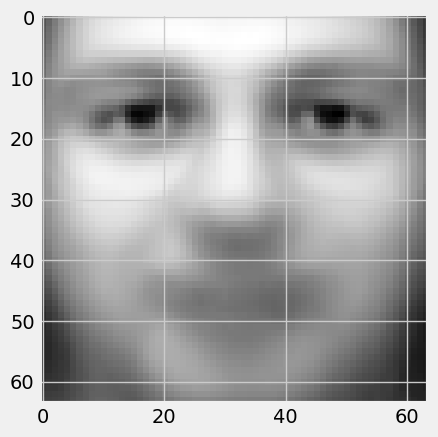

In [21]:
## PLEASE DO NOT EDIT THIS CELL

def mean_face(faces):
    return faces.mean(axis=0).reshape((64, 64))

plt.imshow(mean_face(faces), cmap='gray');

In [22]:
# We have some HUUUGE data matrix which we want to compute its mean
X = np.random.randn(1000, 20)
# Benchmarking time for computing mean
%time mean_naive(X)
%time mean(X)
pass

Wall time: 1.01 ms
Wall time: 0 ns


In [23]:
# Benchmarking time for computing covariance
%time cov_naive(X)
%time cov(X)
pass

Wall time: 53.1 ms
Wall time: 8 ms


In [24]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE

def affine_mean(mean, A, b):
    affine_m = np.zeros(mean.shape) # affine_m has shape (D, 1)
    ### Update affine_m
    affine_m = b + A @ mean
    ###
    return affine_m

In [25]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE
def affine_covariance(S, A, b):
    affine_cov = np.zeros(S.shape) # affine_cov has shape (D, D)
    ### Update affine_cov
    affine_cov = A @ S @ A.T
    ###
    return affine_cov

In [26]:
## PLEASE DO NOT EDIT THIS CELL

from numpy.testing import assert_allclose

A = np.array([[0, 1], [2, 3]])
b = np.ones(2)
m = np.full((2,), 2)
S = np.eye(2)*2

expected_affine_mean = np.array([ 3., 11.])
expected_affine_cov = np.array(
    [[ 2.,  6.],
    [ 6., 26.]])

assert_allclose(affine_mean(m, A, b), expected_affine_mean, rtol=1e-4)
### Some hidden tests below
### ...

In [27]:
## PLEASE DO NOT EDIT THIS CELL

from numpy.testing import assert_allclose

A = np.array([[0, 1], [2, 3]])
b = np.ones(2)
m = np.full((2,), 2)
S = np.eye(2)*2

expected_affine_cov = np.array(
    [[ 2.,  6.],
    [ 6., 26.]])

assert_allclose(affine_covariance(S, A, b), 
                expected_affine_cov, rtol=1e-4)

### Some hidden tests below
### ...

In [28]:
random = np.random.RandomState(42)
A = random.randn(4,4)
b = random.randn(4)

In [44]:
X = random.randn(100, 4)

In [57]:
print(type(b),b)
print("X:", X)
print("A:", A)
print("b:", b)


<class 'numpy.ndarray'> Ellipsis
X: [[ 2.06074792  1.75534084 -0.24896415  0.97157095]
 [ 0.64537595  1.36863156 -0.96492346  0.68605146]
 [ 1.05842449 -1.75873949 -1.18325851 -2.03923218]
 [-0.26940683  0.71754226  1.50235705  0.07409478]
 [ 1.62861555 -1.38010146 -1.70338244 -0.0555477 ]
 [ 0.38406545 -0.03269475 -2.0674421  -0.08912004]
 [-1.3044695   0.66967255  0.36659825 -0.93987979]
 [-0.51386692 -1.05921352 -0.0626791   0.95514232]
 [-0.98572605  0.50404652 -0.53025762 -0.79287283]
 [-0.10703036 -1.03524232 -0.55364931 -1.19787789]
 [ 1.96472513  0.03526355 -0.69972551  0.21397991]
 [-0.11232805 -0.2209696   0.6141667   0.75750771]
 [-0.53050115 -0.57581824 -0.2750517  -2.30192116]
 [-1.51519106  1.36687427  1.64496771 -0.24903604]
 [ 0.57655696  0.31125015  3.07888081  1.11957491]
 [-0.12791759 -0.95554044 -1.60644632  0.20346364]
 [-0.75635075 -1.42225371 -0.64657288 -1.081548  ]
 [ 1.68714164  0.88163976 -0.00797264  1.47994414]
 [ 0.07736831 -0.8612842   1.52312408  0.53891

In [58]:
A = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])


In [60]:
b = np.array([1, 2, 3, 4])

In [61]:
X1 = np.dot(X, A) + b.reshape(1, -1)  # applying affine transformation once
X2 = np.dot(X1, A) + b.reshape(1, -1)  # twice

In [66]:
# Print out intermediate values for debugging
print("X1:", X1)
print("X2:", X2)
print("Expected X2:", affine_mean(affine_mean(X, A, b), A, b))

X1: [[ 2.14640858  1.88109818  1.26044544 -1.09452662  0.14632404 -0.03196902
   2.65615638  1.61731174 -1.81764282 -0.34436408 -0.63798965 -1.76932424
  -2.05954752  1.51966216 -1.76569535  0.58345635  1.2643915   0.21363319
   0.54985097  1.8499199  -0.67253402  1.30973356 -0.29045706  1.89632577
  -0.21702591 -1.87941841 -2.24908759 -1.39865991  0.98194044  0.65269527
  -1.98114695 -0.10742457 -2.10697376 -0.78835835 -1.73196826 -2.2602313
   0.05575303 -0.79964056  0.02060385 -0.36813851 -1.25924952  3.73365511
  -1.01780596 -0.32619281 -1.50426968 -1.57818121  1.18576347  0.03207858
  -3.28216469  0.5935542  -1.00775898 -0.62241867 -1.40124932 -0.38099597
  -0.17165616 -0.38770821  0.25782352  0.92652707 -0.13732034 -1.14657544
  -3.0056012   0.05656946  0.87746474 -0.2821948   0.28502358  0.27873538
  -0.39509328  0.75294478  0.85551121 -0.6301278   1.22113556 -1.40997861
  -0.99773048  0.71911831 -0.48895487  1.04997747  2.06222858  0.70974358
   1.10163637  0.36787948  2.803692

In [81]:
import numpy as np
import numpy.testing as npt

# Affine transformation functions
def affine_mean(mean, A, b):
    mean = mean.reshape(-1, 1)  # Reshape mean to (100, 1)
    # Compute the affine transformation
    affine_m = b + np.dot(A, mean)
    return affine_m

def affine_covariance(covariance, A, b):
    affine_cov = np.dot(A, np.dot(covariance, A.T))
    return affine_cov

# Example data
X = np.random.rand(4, 100)  # Example data with shape (4, 100)
A = np.random.rand(4, 4)     # Affine transformation matrix with shape (4, 4)
b = np.random.rand(4)        # Translation vector with shape (4,)

# Affine transformation
X1 = np.dot(A, X) + b.reshape(-1, 1)  # Applying affine transformation once
X2 = np.dot(A, X1) + b.reshape(-1, 1)  # Applying affine transformation twice

# Check the mean and covariance
npt.assert_allclose(np.mean(X1, axis=1), affine_mean(np.mean(X, axis=1), A, b))
npt.assert_allclose(np.cov(X1), affine_covariance(np.cov(X), A, b))


AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

(shapes (4,), (4, 4) mismatch)
 x: array([1.04103 , 1.250596, 1.526884, 1.513672])
 y: array([[1.04103 , 1.601449, 1.513415, 1.77923 ],
       [0.690177, 1.250596, 1.162562, 1.428377],
       [1.054498, 1.614918, 1.526884, 1.792698],
       [0.775472, 1.335891, 1.247857, 1.513672]])

In [70]:
np.testing.assert_allclose(mean(X1), affine_mean(mean(X), A, b))
np.testing.assert_allclose(cov(X1),  affine_covariance(cov(X), A, b))

ValueError: shapes (4,4) and (100,) not aligned: 4 (dim 1) != 100 (dim 0)

In [65]:
import numpy as np
from numpy.testing import assert_allclose

# Define the affine transformation function for mean
def affine_mean(mean, A, b):
    return A @ mean + b.reshape(-1, 1)

# Define the affine transformation function for covariance
def affine_covariance(S, A, b):
    return A @ S @ A.T

# Define the input data X, transformation matrix A, and translation vector b
X = np.random.randn(4, 100)  # Example input data with shape (4, 100)
A = np.random.randn(4, 4)     # Example transformation matrix with shape (4, 4)
b = np.random.randn(4)        # Example translation vector with shape (4,)

# Apply the affine transformation once to get X1
X1 = affine_mean(X, A, b)

# Apply the affine transformation twice to get X2
X2 = affine_mean(X1, A, b)

# Perform assertions to check the correctness of the transformations
assert_allclose(X2, affine_mean(X, A, b))


AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

Mismatched elements: 400 / 400 (100%)
Max absolute difference: 12.83024407
Max relative difference: 463.10218885
 x: array([[  0.564668,   2.844256,   3.371906,   2.287182,   0.333144,
          1.357829,   1.702714,   4.032196,  -0.491022,   0.470595,
          0.679595,   0.384876,  -2.676865,   1.670535,  -4.519875,...
 y: array([[ 2.146409,  1.881098,  1.260445, -1.094527,  0.146324, -0.031969,
         2.656156,  1.617312, -1.817643, -0.344364, -0.63799 , -1.769324,
        -2.059548,  1.519662, -1.765695,  0.583456,  1.264391,  0.213633,...